# Program used in Figure 4D and 4E

This program is used for Figure 4D and 4E.

### import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os 
import seaborn as sns

### Matplotlib setting

In [2]:
plt.rcParams['text.usetex'] = True 
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sansmath}', r'\sansmath'] 
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.rcParams["font.size"] = 16.0

plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

### import the data of mCherry-CAT fluorescence intensities and cellular fate

Import data installed in deletion_fraction_data folder.  
Some data length are smaller than the total resistance-gene-deleted cell lineages in Figure 4C.  
That's because fluorescence intensities of some cell at Cp exposure cannot be aquired properly due to unindended high background.

In [3]:
dr = './deletion_fraction_data/Total'
Data_list = os.listdir(dr)

### data for Figure 4D
Result_total_sort = pd.concat([pd.read_csv(dr+'/'+i) for i in Data_list]).loc[:,['Dividing','MeanTxRed','Time']].sort_values('MeanTxRed').reset_index()
Data_list_by_time = [Result_total_sort[Result_total_sort['Time'] == i]['MeanTxRed'] for i in [0,3,6,10,20]] ### 0, 3, 6 and 10 represent T_c. 20 denotes "Pre-deleted"

### data for Figure 4E
Result_total_sort2 = Result_total_sort.loc[:,['Time','MeanTxRed']].sort_values('Time').reset_index()
Result_total_sort2['Time'] = Result_total_sort2['Time'].astype(str)

### plot and save histogram and bar plot.

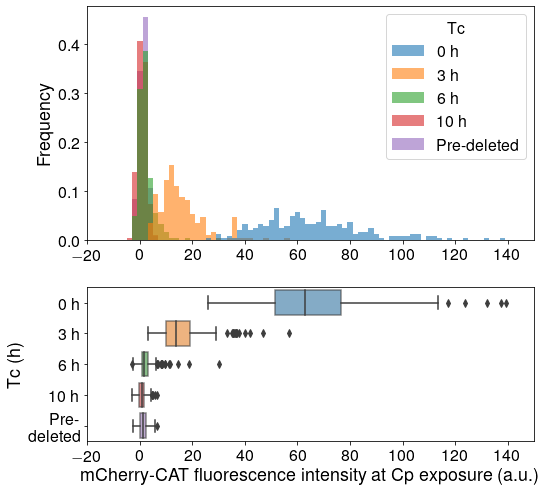

In [4]:
bins = np.arange(-13,140,2)
legend_list = ['0 h','3 h','6 h','10 h','Pre-deleted']
fig = plt.figure(figsize=(8, 8)) 
gs = gridspec.GridSpec(11, 1)

ax1 = plt.subplot(gs[0:6, 0]) ### Figure 4D
ax2 = plt.subplot(gs[7:11, 0]) ### Figure 4E

for number in np.arange(len(Data_list_by_time)):
    weight = np.ones(len(Data_list_by_time[number]))/len(Data_list_by_time[number])
    ax1.hist(Data_list_by_time[number], histtype = 'barstacked',bins = bins, weights = weight, alpha = 0.6,label = legend_list[number], zorder = 5-number)

ax1.legend(title = 'Tc')
ax1.set_ylabel('Frequency', fontsize =18)
ax1.set_xlim(-20,150)

sns.boxplot(x='MeanTxRed', y = 'Time', order = ['0','3','6','10','20'],orient = 'h',data = Result_total_sort2, ax = ax2, boxprops = dict(alpha=0.6))
ax2.set_xlim(-20,150)
ax2.set_xlabel('mCherry-CAT fluorescence intensity at Cp exposure (a.u.)', fontsize =18)
ax2.set_ylabel('Tc (h)', fontsize =18)
plt.setp(ax2, yticks = [4,3,2,1,0],yticklabels = ['Pre-\ndeleted','10 h','6 h','3 h','0 h'])

plt.show()
#plt.savefig('./Figure4D_E.pdf', transparent = True, bbox_inches = 'tight')